## SIMULATION

In [ ]:
import numpy as np
import csv

In [ ]:
x, y = np.meshgrid(np.linspace(-1,1,10), np.linspace(-1,1,10))  # create a grid a 10x10 grid
d = np.sqrt(x*x + y*y) # compute the eucllidean distance between the centre and any set of points
sigma, mu = 0.5, 0.0 #spread componennts
gaussian_distribution = np.exp(-( (d-mu)**2 / (2.0 * sigma**2) ))
mask = np.exp(-( (d-mu)**2 / (2.0 * sigma**2) ))
mask = mask > 0.8# This creates a boolean mask for regions in contact with the hand make this smaller for a bigger hand and make the value bigger for a bigger hand


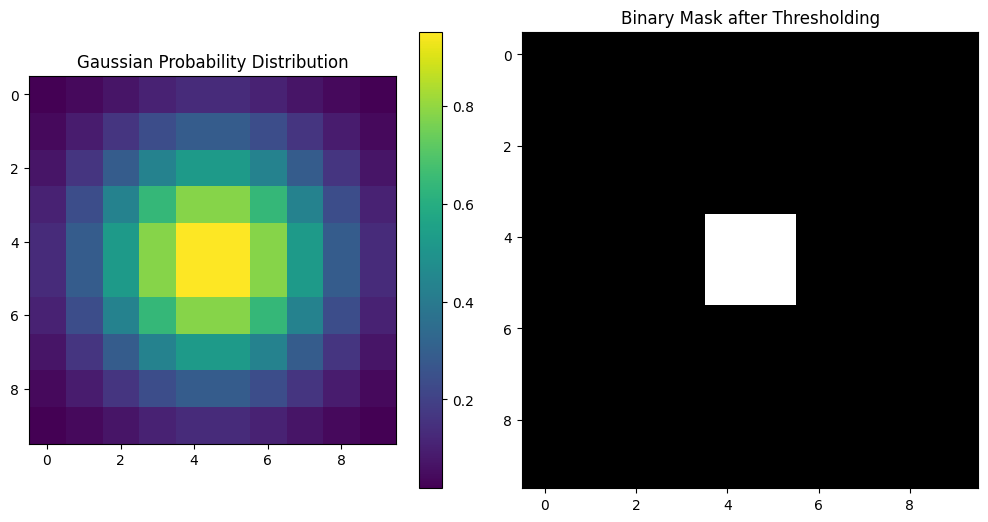

In [ ]:
# Plotting the Gaussian probability distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gaussian_distribution, cmap='viridis', interpolation='none')
plt.colorbar()
plt.title('Gaussian Probability Distribution')

# Plotting the binary mask
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray', interpolation='none')
plt.title('Binary Mask after Thresholding')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import csv

# Define the Gaussian hand contact mask
x, y = np.meshgrid(np.linspace(-1,1,10), np.linspace(-1,1,10))
d = np.sqrt(x*x + y*y)
sigma, mu = 0.5, 0.0
mask = np.exp(-( (d-mu)**2 / (2.0 * sigma**2) ))
mask = mask > 0.3  # This creates a boolean mask for regions in contact with the hand

def temperature_func(t, increment=0):
    """Function to model temperature oscillation."""
    base_temp = 36.5 + np.sin(2 * np.pi * t / (24*12)) + np.random.normal(0, 0.1)
    return base_temp + increment

import numpy as np
import csv


def generate_simulation(num_simulations=50, ulcer_size=2):
    time_points = 24*60*12
    simulations = []

    for sim in range(num_simulations):
        # Initialize the temperature dataset with the baseline temperature
        temperatures = np.zeros((10, 10, time_points))
        for t in range(time_points):
            temperatures[:, :, t] = temperature_func(t/12)

        # Identify a random start point for the ulcer/cut within the hand region
        start_x = np.random.randint(0, 10-ulcer_size)
        start_y = np.random.randint(0, 10-ulcer_size)

        # Ensure the selected region is within the hand
        while np.sum(mask[start_x:start_x+ulcer_size, start_y:start_y+ulcer_size]) != ulcer_size**2:
            start_x = np.random.randint(0, 10-ulcer_size)
            start_y = np.random.randint(0, 10-ulcer_size)

        # Choose a random start time for the temperature rise, ensuring we have 6 hours for the entire process
        rise_start_time = np.random.randint(0, time_points - 6*60*12)

        # Simulate temperature rise and decline
        for t in range(rise_start_time, rise_start_time + 6*60*12):  # 6 hours in total
            if t < rise_start_time + 3*60*12:
                increment = (40 - 36.5) * (t - rise_start_time) / (3*60*12)
                temperatures[start_x:start_x+ulcer_size, start_y:start_y+ulcer_size, t] += increment
            else:
                decrement = (40 - 36.5) * (t - rise_start_time - 3*60*12) / (3*60*12)
                temperatures[start_x:start_x+ulcer_size, start_y:start_y+ulcer_size, t] -= decrement

        # Save to CSV
        with open(f'simulation_{sim+1}_ulcer_at_{start_x}_{start_y}.csv', 'w', newline='') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(['Sensor X', 'Sensor Y', 'Time (5s intervals)', 'Temperature (°C)'])
            for t in range(time_points):
                for i in range(10):
                    for j in range(10):
                        writer.writerow([i, j, t, temperatures[i, j, t]])

        # Append to our list (optional, in case we want to work with data later)
        simulations.append(temperatures)

    return simulations

simulations = generate_simulation()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
path = "/content/simulation_10_ulcer_at_3_2.csv"
data = pd.read_csv(path)


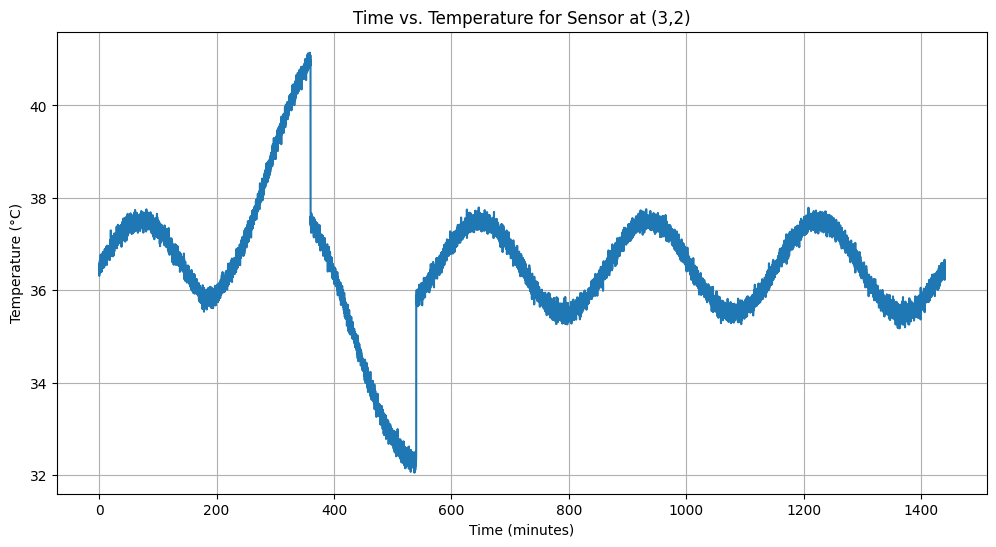

In [ ]:
filtered_data = data[(data['Sensor X'] == 3) & (data['Sensor Y'] == 2)]

plt.figure(figsize=(12,6))
plt.plot(filtered_data['Time (5s intervals)'] * 5 / 60, filtered_data['Temperature (°C)'])  # Time is converted to minutes
plt.title('Time vs. Temperature for Sensor at (3,2)')
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()